# Before start to train a Model, let's learn more about the SKlearn API

In [1]:
import numpy as np
import pandas as pd

# Implementing the first simple linear regression

In [3]:
X = pd.read_csv('./files/datasets/x_movies.csv') # Import clean data
Y = X['worldwide_gross'] # Set the target data
X = X.drop('worldwide_gross', axis=1)

## Splitting the training and testing data

In [9]:
from sklearn.model_selection import train_test_split

# 40% for testing data and 60% for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4) # "train_size=0.6" is set automatically

In [11]:
#Let's check the length of the data

print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [12]:
X.head(1) # Checking if we have all the columns

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,760505847.0


## Implementation

In [13]:
from sklearn.linear_model import Lasso

model = Lasso()

In [14]:

model.fit(X_train, Y_train) # Model trained :D

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
# Predicting the test data

predicted = model.predict(X_test)
predicted

array([-6.63466691e+06, -1.05865641e+07, -1.46562568e+07, ...,
        3.92127924e+08,  1.18110157e+07, -2.39725743e+07])

([array([1.000e+00, 0.000e+00, 0.000e+00, 5.780e+02, 1.002e+03, 5.700e+01,
         3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00]),
  array([  0.,   0.,   0., 646., 935.,  47.,  12.,   1.,   0.,   1.])],
 array([-1.82765712e+09, -1.36649951e+09, -9.05341900e+08, -4.44184290e+08,
         1.69733202e+07,  4.78130931e+08,  9.39288541e+08,  1.40044615e+09,
         1.86160376e+09,  2.32276137e+09,  2.78391898e+09]),
 <a list of 2 Lists of Patches objects>)

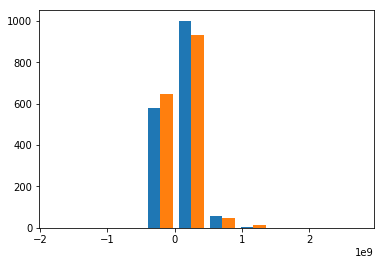

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, Y_test])

# Evaluating the model


In [20]:
model.score(X_test, Y_test) # This is a very nice score, but we have to graph this in order to check any error

0.7660490566155851

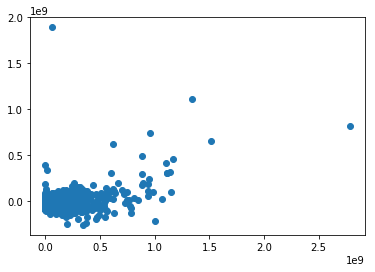

In [21]:
residuals = Y_test - predicted
plt.scatter(Y_test, residuals)

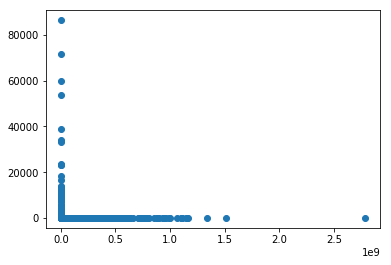

In [23]:
ap_residuals = np.abs(residuals) / Y_test
plt.scatter(Y_test, ap_residuals)

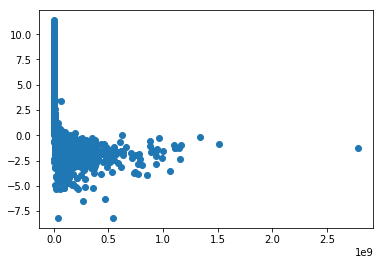

In [24]:
lap_residuals = np.log(ap_residuals)
plt.scatter(Y_test, lap_residuals)

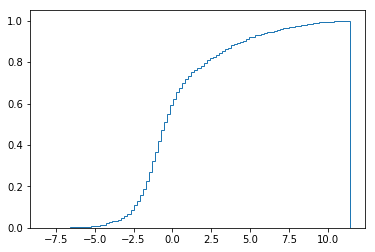

In [27]:
plt.hist(lap_residuals, bins=100, density=1, histtype='step', cumulative = True);

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

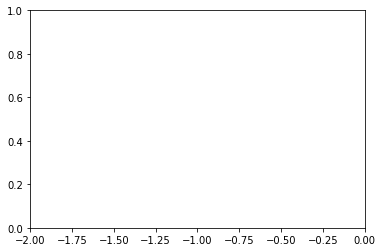

In [29]:
# Making some zoom

plt.axis([-2, 0, 0, 1])
np.power(np.exp(1)*np.ones(5), np.linspace(-2, 0, 5))